<img src="./img/logos_combined.png" align="right" width="50%"></img>
<br><br><br>

# Geospatial data workflow
## Step by Step

- [Part I: Geospatial Data Access](#geospatial_dataaccess) 
- [Part II: Geopspatial Data Processing](#geospatial_dataprocessing) 
- [Part III: Geospatial Data Visualization](#geospatial_dataviz)

<hr>
<a href="./jupyter_notebooks_for_geospatial_data_analysis_tutorial.ipynb"><< Index</a>&nbsp;<space>&nbsp;<space>&nbsp;<space>&nbsp;<space>&nbsp;<space>&nbsp;<space>&nbsp;<space>&nbsp;<space>&nbsp;<space>&nbsp;<space> <a href="./02_geospatial_data_workflow_guided_challenge.ipynb">Geospatial Data Workflow - Guided Challenge >></a>

<img src="./img/access_button.png" align="left" width="10%"></img>

## <a id="geospatial_dataaccess"></a>Part I: Geospatial Data Access

### Example with OGC web services

#### What are OGC web services?

Web services offer a variety of standard protocols that use the internet to view, access and retrieve geospatial data. The Open Geospatial Consortium (OGC) has defined various different protocols for geospatial data.

<br>
<img src="./img/ogc_standards.jpg" align="centre" width="70%"></img>
<br>


#### WMS requests

A Web Mapping Service (WMS) is a widely-used OGC standard for geospatial datasets that returns spatial data as an 'image' or 'static map'.
> the ** *GetCapabilities* ** request returns an XML document with information to the service and data provider and an overview of all the maps available on the web server

>> Example: <a href="http://apps.ecmwf.int/wms/?token=public&version=1.3.0&request=GetCapabilities" target="_blank">http://apps.ecmwf.int/wms/?token=public&version=1.3.0&request=GetCapabilities</a>

> the ** *GetMap* ** request returns a static map / image
>> Example: retrieve Aerosol Optical Depth (AOD) at 550 nm  
<a href='apps.ecmwf.int/wms/?token=public&version=1.3.0&request=GetMap&layers=composition_aod550&style=sh_BuYlRd_aod_lowthreshold' target="_blank">apps.ecmwf.int/wms/?token=public&version=1.3.0&request=GetMap&layers=composition_aod550</a>

#### WCS core requests

A Web Coverage Service is a data-access protocol that defines and enables the web-based retrieval of multi-dimensional geospatial datasets.  
The WCS core supports three main HTTP requests (operations), which are submitted in the form of a URL:
> the ** *GetCapabilities* ** request returns an XML document with information to the service and data provider and an overview of all the coverages (geospatial fields) available on the web server

>> Example: <a href="http://earthserver.ecmwf.int/rasdaman/ows?service=WCS&version=2.0.11&request=GetCapabilities" target="_blank">http://earthserver.ecmwf.int/rasdaman/ows?service=WCS&version=2.0.11&request=GetCapabilities</a>

> the ** *DescribeCoverage* ** request returns an XML document with metadata information of one specific coverage
>> Example: get information about 2m air temperature coverage  
<a href="http://earthserver.ecmwf.int/rasdaman/ows?service=WCS&version=2.0.11&request=DescribeCoverage&coverageId=temp2m" target="_blank">http://earthserver.ecmwf.int/rasdaman/ows?service=WCS&version=2.0.11&request=DescribeCoverage&coverageId=temp2m</a>

> the ** *GetCoverage* ** request returns a full coverage encoded in a specified format, e.g GeoTiff, XML or netCDF
>> Example: retrieve a 2D global field of 2m air temperature of 15 December 2013 in XML format  
<a href='http://earthserver.ecmwf.int/rasdaman/ows?service=WCS&version=2.0.11&request=GetCoverage&coverageId=temp2m&subset=ansi("2013-12-15T00:00")&format=application/gml+xml' target="_blank">http://earthserver.ecmwf.int/rasdaman/ows?service=WCS&version=2.0.11&request=GetCoverage&coverageId=temp2m&subset=ansi("2013-12-15T00:00")&format=application/gml+xml</a>

#### WCPS request


A **Web Coverage Processing Service** is an extension supported by the WCS 2.0 core specification and can optionally be implemented by a WCS server. WCPS allows for crafting queries to be run on the data using a text based query language, similar to SQL.  
The extension specifies an additional WCS request:  
> the ***ProcessCoverages*** request returns a coverage encoded in a specified format (e.g. netCDF or csv) and allows for mathematical calculations on the requested coverages. 
>> Example: Convert a 2D global field of 2m air temperature from 31 December 2015 from K to degC  
<a href='http://earthserver.ecmwf.int/rasdaman/ows?service=WCS&version=2.0.1&request=ProcessCoverages&query=for c in (temp2m) return encode (c[ansi("2015-12-31T00:00")] - 273.15,"csv")' target="_blank">http://earthserver.ecmwf.int/rasdaman/ows?service=WCS&version=2.0.1&request=ProcessCoverages&query=for c in (temp2m) return encode (c[ansi("2015-12-31T00:00")] - 273.15,"csv")</a>

<hr>

#### OWSlib library - Using WMS from Python



#### <i>Create a WebMapService object</i>

In [14]:
# load owslib library
from owslib.wms import WebMapService

# Create your WebMapService object
wms = WebMapService('http://apps.ecmwf.int/wms/?token=public', version='1.1.1') # version 1.3.0 works as well

http://apps.ecmwf.int/wms/


#### <i>Request layer information</i>

In [10]:
# See available layers
list(wms.contents)

['t_uerra',
 'z500_public',
 't850_public',
 'ws850_public',
 'composition_aod550',
 'background',
 'composition_bbaod550',
 'boundaries',
 'composition_co2_300hpa',
 'composition_co2_50hpa',
 'composition_co2_500hpa',
 'composition_co2_850hpa',
 'composition_co2_surface',
 'composition_co_300hpa',
 'composition_co_50hpa',
 'composition_co_500hpa',
 'composition_co700',
 'composition_co_850hpa',
 'composition_co_upperlevel',
 'composition_co_surface',
 'composition_uvindex_clearsky',
 'composition_duaod550',
 'efas_radar_haz1h',
 'efas_radar_acc',
 'efas_radar_acc24h',
 'z500_mean_public',
 't850_mean_public',
 'ws850_mean_public',
 'msl_mean_public',
 'z500_spread_public',
 't850_spread_public',
 'ws850_spread_public',
 'msl_spread_public',
 'composition_fire',
 'foreground',
 'composition_hcho_300hpa',
 'composition_hcho_50hpa',
 'composition_hcho_500hpa',
 'composition_hcho_850hpa',
 'composition_hcho_surface',
 'grid',
 'msl_public',
 'composition_ch4_300hpa',
 'composition_ch4_50h

#### <i>Get layer description</i>

In [19]:
wms['composition_co2_surface'].title

'Carbon dioxide at surface [ ppmv ] (provided by CAMS, the Copernicus Atmosphere Monitoring Service)'

#### <i>Get bounding box information in WGS84</i>

In [12]:
wms['composition_co2_surface'].boundingBoxWGS84

(-180.0, -90.0, 180.0, 90.0)

#### <i>Get available styles</i>

In [21]:
wms['composition_co2_surface'].styles

{'sh_RdGy_r_co2_surface': {'legend': 'http://apps.ecmwf.int/wms/?token=public&request=GetLegend&layers=composition_co2_surface&styles=sh_RdGy_r_co2_surface&width=350&height=50',
  'title': 'Contour shade (Range: 180.0 / 440.0, RdGy_r colours)'},
 'sh_nipy_spectral_co2_surface': {'legend': 'http://apps.ecmwf.int/wms/?token=public&request=GetLegend&layers=composition_co2_surface&styles=sh_nipy_spectral_co2_surface&width=350&height=50',
  'title': 'Contour shade (Range: 180.0 / 440.0, nipy_spectral colours)'}}

#### <i>See available methods</i>

In [22]:
[op.name for op in wms.operations]

['GetCapabilities', 'GetMap', 'GetFeatureInfo']

#### <i>Get available formats</i>

In [23]:
wms.getOperationByName('GetMap').formatOptions

['image/png',
 'image/svg+xml',
 'application/pdf',
 'application/postscript',
 'application/vnd.google-earth.kml+xml']

#### <i>Request a map</i>

http://apps.ecmwf.int/wms/?token=public&
http://apps.ecmwf.int/wms/?token=public&
http://apps.ecmwf.int/wms/?token=public&


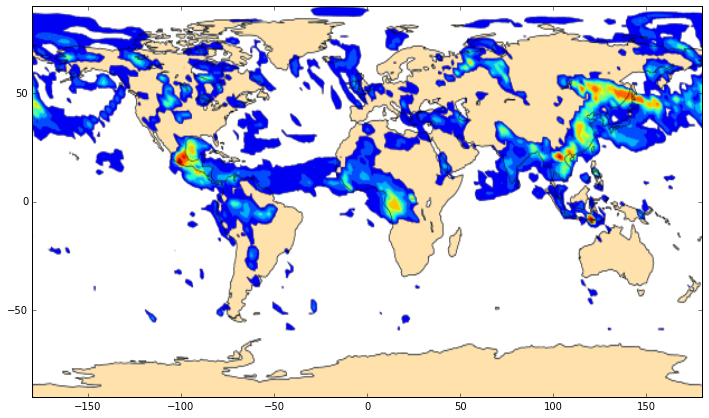

In [18]:
%matplotlib inline
import os, sys
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

def getMap(layerName,bbox,filename):
    wms.getOperationByName('GetMap').formatOptions
    img = wms.getmap(layers=[layerName],
                 size=(600,300),
                 srs='EPSG:4326',
                 bbox=bbox,
                 format='image/png',
                 transparent=True)

    tmpfile = open(filename,'wb')
    tmpfile.write(img.read())
    tmpfile.close()
getMap('foreground',(-180,-90,180,90), 'foreground.png')
getMap('background',(-180,-90,180,90), 'background.png')
getMap('composition_bbaod550',(-180,-90,180,90), 'bbaod550.png')


image1=mpimg.imread('background.png')
image2=mpimg.imread('bbaod550.png')
image3=mpimg.imread('foreground.png')
fig = plt.figure(figsize=(12,7))

img1=plt.imshow(image1,extent=[-180,180,-90,90],aspect='auto')
img2=plt.imshow(image2,extent=[-180,180,-90,90],aspect='auto')
img3=plt.imshow(image3,extent=[-180,180,-90,90],aspect='auto')
plt.show()

#### OWSlib library - Using WCS from Python

The OWSLib library is a python library that makes accessing data and metadata through OGC services possible. The library abstracts all of the traditional HTTP API calls into programmatic function calls. An example of the use of the WebCoverageService class is given.

The library is available from GitHub @ https://github.com/earthserver-eu/OWSLib

#### <i>Create a WebCoverageService (WCS) object</i>

In [26]:
from owslib.wcs import WebCoverageService

ecmwf_wcs = WebCoverageService('http://earthserver.ecmwf.int/rasdaman/ows?', version='2.0.0')

http://earthserver.ecmwf.int/rasdaman/ows?service=WCS&request=GetCapabilities&version=2.0.0


#### <i>Get a list of available coverages</i>

In [27]:
for coverage_name in ecmwf_wcs.contents.keys():
    print coverage_name

soil_moisture
T2m
pl_t2m
river_discharge_forecast
pl_relhum
no2
geff_fire_weather_index
geff_fire_weather_index_test9
geff_fire_weather_index_test8
geff_fire_weather_index_test7
geff_fire_weather_index_test6
geff_fire_weather_index_test5
geff_fire_weather_index_test4
geff_fire_weather_index_test3
geff_fire_weather_index_test2
TP
ecfire_fire_weather_index
o3
geff_fire_weather_index_test
pm25
return_level20
discharge_reanalysis
river_discharge_forecast_test6
temp2m
return_level2
precipitation
return_level5
mslp
pm10
SST
ECMWF_SST_4326_05
pl_geopot
river_discharge_forecast_opt2
geff_fire_weather_index_test11
geff_fire_weather_index_test10
ERA_discharge


#### <i>Retrieve a list of available properties of a coverage</i>

In [49]:
for item in dir(ecmwf_wcs.contents['temp2m']):
    if "_" not in item:
        print item

abstract
axisDescriptions
boundingBox
boundingBoxWGS84
boundingboxes
crsOptions
defaulttimeposition
descCov
grid
id
keywords
styles
supportedCRS
supportedFormats
timelimits
timepositions
title


#### <i>Retrieve bounding box information</i>

In [46]:
ecmwf_wcs.contents['temp2m'].boundingboxes

[{'bbox': (-90.25, -180.25, 90.25, 179.75),
  'nativeSrs': 'http://localhost:8080/def/crs-compound?1=http://localhost:8080/def/crs/EPSG/0/4326&2=http://localhost:8080/def/crs/OGC/0/AnsiDate'}]

#### <i>Retrieve grid property information</i>

In [39]:
for item in dir(ecmwf_wcs.contents['temp2m'].grid):
    if "_" not in item:
        print item + ": " + str(ecmwf_wcs.contents['temp2m'].grid.__dict__[item])

axislabels: ['Lat', 'Long', 'ansi']
dimension: 3
highlimits: ['719', '360', '54107']
lowlimits: ['0', '0', '0']
offsetvectors: [['-0.5', '0', '0'], ['0', '0.5', '0'], ['0', '0', '0.25']]
origin: ['90', '-180', '"1978-12-31T21:00:00.000Z"']


#### <i>Retrieve supported formats</i>

In [ ]:
ecmwf_wcs.contents['temp2m'].supportedFormats

#### <i>Build a GetCoverage request based on the collected coverage information</i>

WCS 2.0.0 DEBUG: Second part of URL: format=application%2Fnetcdf&version=2.0.0&request=GetCoverage&service=WCS&CoverageID=temp2m&subset=Long%28-180%2C179.5%29&subset=Lat%28-90%2C90%29&subset=ansi%28%222003-08-01T12%3A00%22%2C%222003-08-01T18%3A00%22%29
http://earthserver2e.ecmwf.int:8080/rasdaman/ows


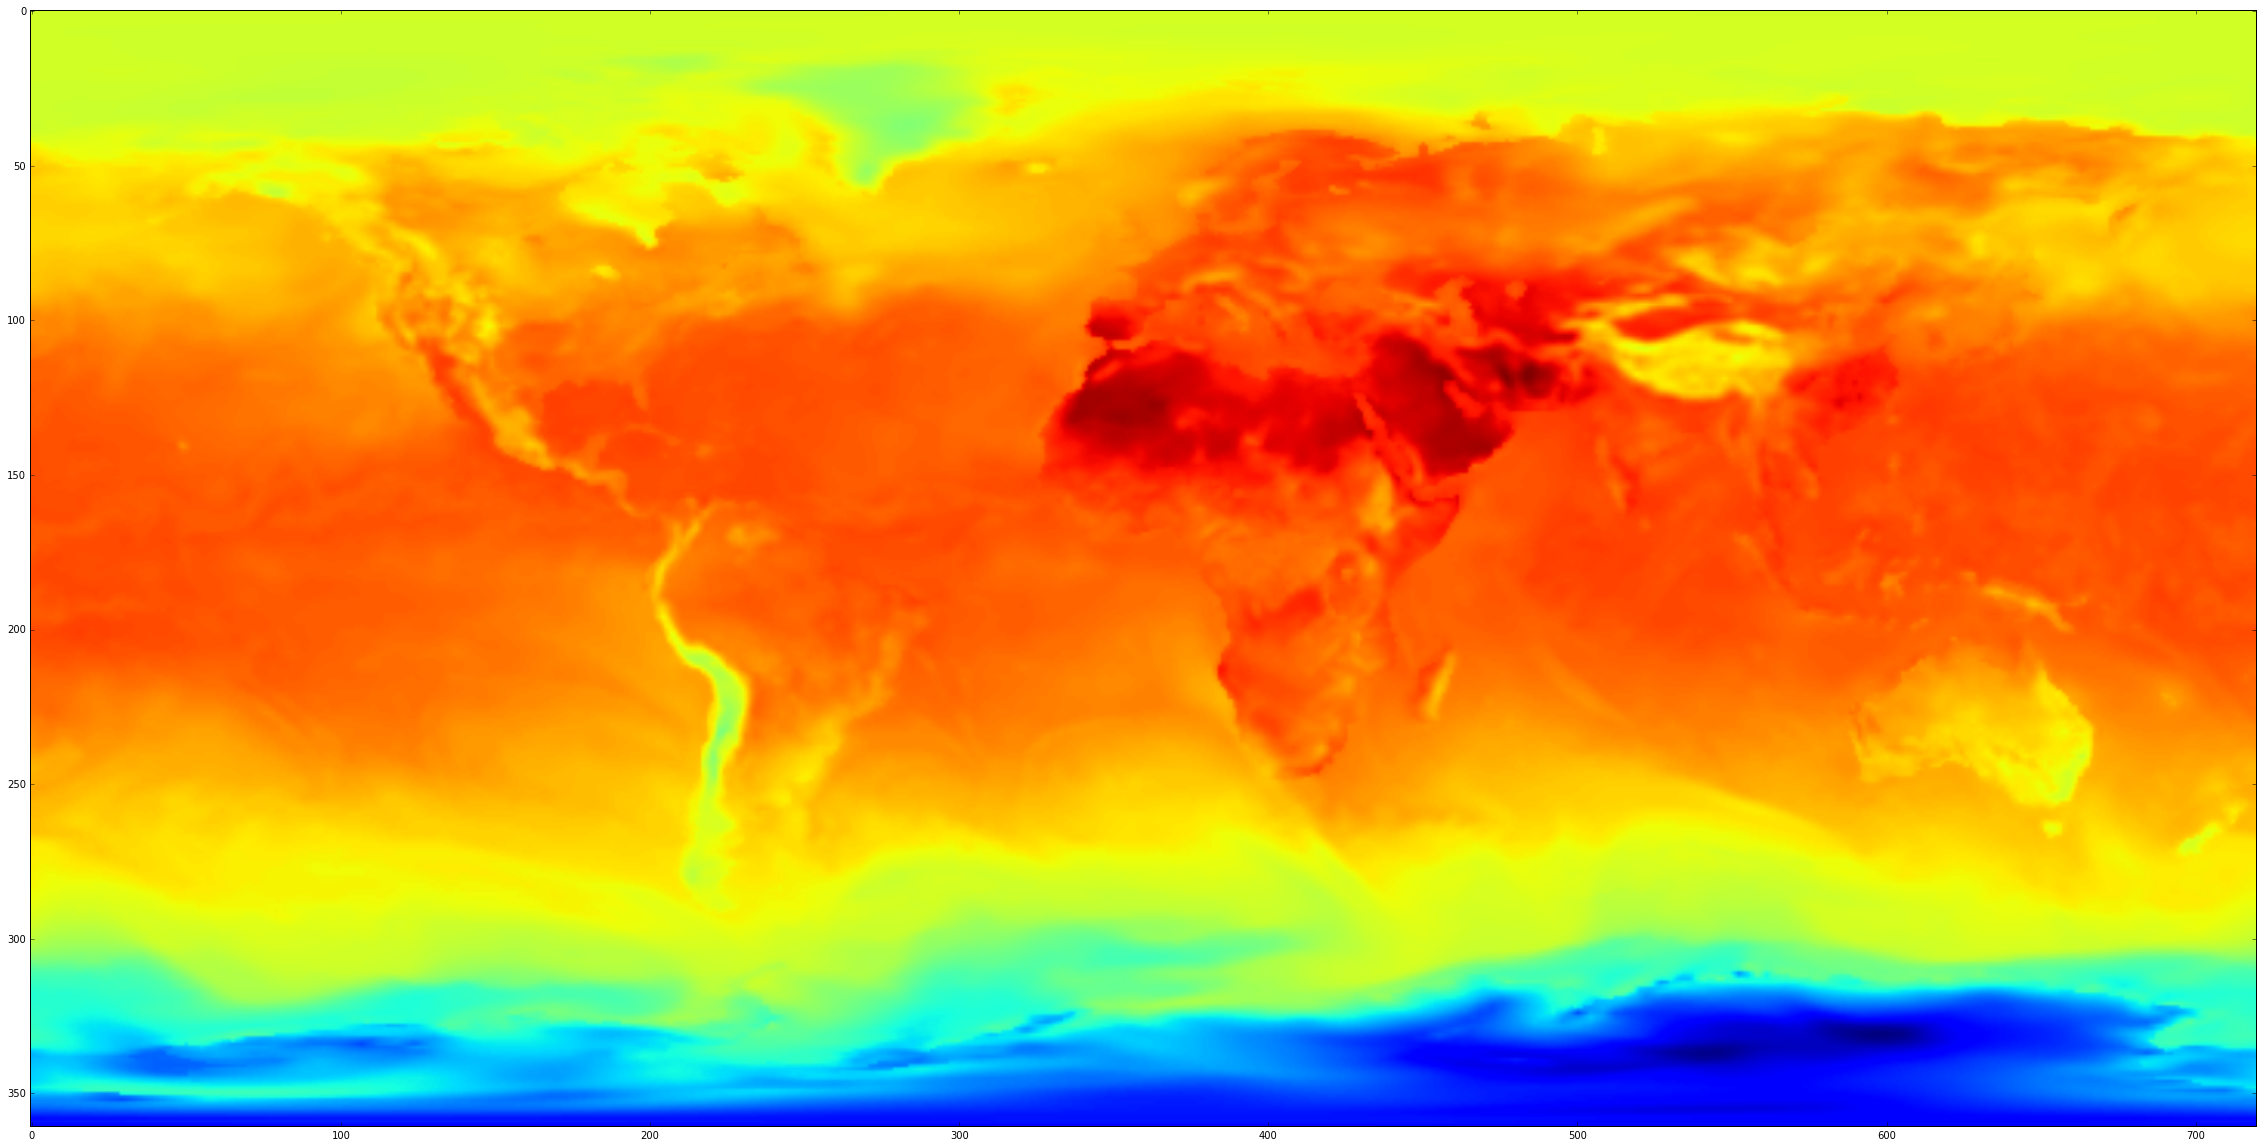

In [47]:
# Request a global 2m air temperature data field from 1 August 2003 at 12:00 UTC as netcdf.
# Store the file temporarily and load it for plotting of the data field

%matplotlib inline
import netCDF4 as nc
import numpy as np
from matplotlib import pyplot as plt

# GetCoverage request
coverage_file = ecmwf_wcs.getCoverage(identifier=['temp2m'], format='application/netcdf', 
                                      subsets=[('Long',-180,179.5),('Lat',-90,90),('ansi',"2003-08-01T12:00","2003-08-01T18:00")])

# Store the requested field as netCDF file
with open('testCoverage1.nc','w') as outfile:
    outfile.write(coverage_file.read())

# Open the stored netCDF file
ncdata = nc.Dataset("testCoverage1.nc","a",format="NETCDF4")

# Retrieve the data from the netCDF object
data = np.flipud(np.rot90(ncdata.variables['field_1'][:,:,0]))

# Plot the data
plt.figure(figsize=(40,20))
plt.imshow(data)

<hr>

<img src="./img/processing_button.png" align="left" width="10%"></img>

## <a id="geospatial_dataprocessing"></a>Part II: Geospatial Data Processing

### From WC(P)S to a python list / numpy array

Two examples are presented how WCPS requests can dynamically stored in a python list or numpy array without temporary data storage.

#### Retrieve a time-series of global monthly averages of 2m air temperature and store it as python list


WCS request of retrieving a time series of global monthly means. In the placeholders the parameter and the temporal limits of the time-series (in ISO-format, e.g. "2010-01-01T00:00") have to be specified. The query contains following processing steps: (1) Surface temperature values in Kelvin are converted to degree Celsius and (2) 6-hourly global time-series is averaged based on specified time-series limits.
* Access point: http://earthserver.ecmwf.int/rasdaman/ows?service=WCS&version=2.0.1
* Request type: &ProcessCoverages
* WCPS query (example): &query=for c in (temp2m) return encode(avg(c[ansi("2001-01-01T00:00":"2001-01-31T18:00")] - 273.15), "csv")



In [60]:
url_fmt = 'http://earthserver.ecmwf.int/rasdaman/ows?service=WCS&version=2.0.1' \
          '&request=ProcessCoverages' \
          '&query=for c in (%s) return encode(avg(c[ansi("%s":"%s")] - 273.15), "csv")'

In [84]:
# Helper lists for handling datetime objects

from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

# A list for every first day in the month from Jan 1979 to Dec 2014
startDateList = (range(12))
x =datetime(1979,1,1,0)
for i in range(0,len(startDateList)):
    startDateList[i]=x
    x=(x.replace(day=1)+timedelta(days=31)).replace(day=1)

# A list with every last day of the month from Jan 1979 to Dec 2014
endDateList = (range(12))
for i in range(0, len(endDateList)):
    y = startDateList[i].replace(hour=18) + relativedelta(day=31)
    endDateList[i]=y

In [85]:
import requests
# Go through the helper lists and retrieve for every month the monthly global mean of 2m air temperature 
# and append a list of monthly global means.
monthlyAvgTS = []
for i,j in zip(startDateList,endDateList):
    url = url_fmt % ("temp2m", i.isoformat(),j.isoformat())
    r= requests.get(url,
                proxies={'http':None}
                )

    r.raise_for_status()
    k= [float(a) for a in r.text[1:-1].split(",")]
    monthlyAvgTS.append(k[0])

In [83]:
monthlyAvgTS

[3.619025,
 2.227256,
 2.868785,
 3.878359,
 5.634751,
 7.158366,
 7.157763,
 7.103286,
 6.331698,
 4.986968,
 4.38573,
 4.36766]

#### Retrieve global monthly average 2m air temperature fields and store them into a multi-dimensional numpy array

WCS request of retrieving all global fields of one specific month and processing the monthly average of every grid-point on-the-fly. The query contains following processing steps: (1) Surface temperature values in Kelvin are converted to degree Celsius and (2) 6-hourly global surface temperature fields for one specific month are averaged.
* Access point: http://earthserver.ecmwf.int/rasdaman/ows?service=WCS&version=2.0.1
* Request type: &ProcessCoverages
* WCPS query:see below



In [86]:
url_fmt_field = 'http://earthserver.ecmwf.int/rasdaman/ows?service=WCS&version=2.0.1' \
    '&request=ProcessCoverages&' \
    'query=for c in (%s) return encode((condense + over $x x(imageCrsDomain(c[Lat(%d:%d), Long(%d:%d),ansi("%s":"%s")], ansi))'\
    'using c[ansi($x)]/%d)-273.15, "csv")'

In [87]:
# Create a raster stack of all monthly surface temperature averages

monthlyStackGlobal = np.empty((361,720,12))
k = 0
for i,j in zip(startDateList,endDateList):
    slices = j.day*4
    url = url_fmt_field % ("temp2m", -90,90,-180,179.5, i.isoformat(),j.isoformat(), slices)
    r= requests.get(url,
                proxies={'http':None}
                )

    r.raise_for_status()
    x = np.array(eval(r.text.replace('{','[').replace('}',']')))
    monthlyStackGlobal[:,:,k] = x.transpose()
    k = k+1

In [92]:
monthlyStackGlobal[:,:,8]

array([[ -5.660747,  -5.660747,  -5.660747, ...,  -5.660747,  -5.660747,
         -5.660747],
       [ -5.83355 ,  -5.835633,  -5.837863, ...,  -5.826486,  -5.82896 ,
         -5.831304],
       [ -5.865272,  -5.867941,  -5.871017, ...,  -5.856304,  -5.859298,
         -5.862196],
       ..., 
       [-53.489084, -53.465321, -53.441671, ..., -53.552804, -53.531532,
        -53.510259],
       [-52.729936, -52.693657, -52.65728 , ..., -52.838807, -52.802479,
        -52.766167],
       [-53.359168, -53.359168, -53.359168, ..., -53.359168, -53.359168,
        -53.359168]])

<hr>

## Example: Create a climate graph for London

A climate graph is commonly used to describe the average weather of one specific location. It contains:
* the <b>long-term average, minimum and maximum air temperature</b> for each month
* the <b>long-term average precipitation</b> for each month

<br>

<img src="./img/climate_graph_london.png" align="centre" width="80%"></img>

<br><br>


### Data required


ERA-Interim reanalysis - 2m air temperature and total precipitation from 1 January 1979 to 31 December 2014
* Format: GRIB
* Spatial resolution: Lat/Lon grid, 0.5 x 0.5 degrees, 720 x 361 gridpoints
* Temporal resolution: 6-hourly
* Data volume: 27 GB per parameter

<br>

### Workflow

(1) Retrieve monthly mean, min and max 2m air temperature from Jan 1979 to Dec 2014

(2) Retrieve monthly sums of total precipitation from Jan 1979 to Dec 2014

(3) Calculate averages for every month for every parameter

(4) Plot the climate graph --> [see Part III: Geospatial Data Visualisation](#geospatial_dataviz)



#### Load required libraries

In [52]:
%matplotlib inline
import requests
import numpy as np
import os
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
import collections

#### Define the WCPS query

With one WCPS request,
* the data can be converted into a different unit, e.g. from Kelvin to degree Celsius, and
* a mathematical condenser, e.g. average, minimum or maximum, can be applied to the data values retrieved


In [ ]:
# WCPS query format for 2m air temperature (conversion of Kelvin to degree Celsius)
url_fmt_temp = 'http://earthserver.ecmwf.int/rasdaman/ows?service=WCS&version=2.0.1' \
          '&request=ProcessCoverages' \
          '&query=for c in (%s) return encode(%s(c[Lat(%d:%d), Long(%d:%d),ansi("%s":"%s")] - 273.15), "csv")'

# WCPS query format for total precipitation (conversion from m of water to mm of water)
url_fmt_precip = 'http://earthserver.ecmwf.int/rasdaman/ows?service=WCS&version=2.0.1' \
          '&request=ProcessCoverages' \
          '&query=for c in (%s) return encode(%s(c[Lat(%d:%d), Long(%d:%d),ansi("%s":"%s")] * 1000), "csv")'

#### Helper functions


In [ ]:
# A list for every first day in the month from Jan 1979 to Dec 2014
startDateList = (range(432))
x =datetime(1979,1,1,0)
for i in range(0,len(startDateList)):
    startDateList[i]=x
    x=(x.replace(day=1)+timedelta(days=31)).replace(day=1)

# A list with every last day of the month from Jan 1979 to Dec 2014
endDateList = (range(432))
for i in range(0, len(endDateList)):
    y = startDateList[i].replace(hour=18) + relativedelta(day=31)
    endDateList[i]=y

startDateListISO=(range(432))
for i in range(0,len(startDateListISO)):
    startDateListISO[i]=startDateList[i].date().isoformat()

#### Function to retrieve data from the Web Coverage Service

In [ ]:
# Function that retrieves for every month all data values from the WCS server and appends the outputs to a python list
def retrieveFromWCS(param, operation, latMin, latMax, lonMin, lonMax):
    if param=="precipitation":
        startDateList[0]=startDateList[0] + timedelta(days=1)
        query = url_fmt_precip
    else:
        query = url_fmt_temp
    monthlyTS = []
    for i,j in zip(startDateList,endDateList):
        url = query % (param, operation, latMin,latMax,lonMin,lonMax,i.isoformat(),j.isoformat())
        r= requests.get(url,
                proxies={'http':None}
                )

        r.raise_for_status()
        y= [float(a) for a in r.text[0:-1].split(",")]
        monthlyTS.append(y[0])
    return monthlyTS

#### (1) Retrieve average, minimum and maximum surface temperature for Brussels for every month

In [ ]:
latMin = 50.52
latMax = 50.52
lonMin = -4.22
lonMax = -4.22
monthlyTS_avg = retrieveFromWCS("temp2m", "avg", latMin, latMax, lonMin, lonMax)
monthlyTS_max = retrieveFromWCS("temp2m", "max", latMin, latMax, lonMin, lonMax)
monthlyTS_min = retrieveFromWCS("temp2m", "min", latMin, latMax, lonMin, lonMax)

#### (2) Retrieve monthly sums of total precipitation for Brussels for every month

In [56]:
latMin = 50.52
latMax = 50.52
lonMin = -4.22
lonMax = -4.22
monthlyTS_sum = retrieveFromWCS("precipitation", "add", latMin, latMax, lonMin, lonMax)

NameError: name 'retrieveFromWCS' is not defined

#### (3) Calculate averages for every month for every parameter

In [ ]:
def calculateMonthlyAvgTS (inputArray):
    tmp = np.empty((12))
    for i in range(0,12):
        month = inputArray[i::12]
        tmp[i] = np.mean(month, axis=0)
    return tmp

monthsAvg = calculateMonthlyAvgTS(monthlyTS_avg)
monthsMax = calculateMonthlyAvgTS(monthlyTS_max)
monthsMin = calculateMonthlyAvgTS(monthlyTS_min)
monthsAvg_precip = calculateMonthlyAvgTS(monthlyTS_sum)

<hr>

<img src="./img/visualisation_button.png" align="left" width="10%"></img>

## <a id="geospatial_dataviz"></a>Part III: Geospatial Data Visualisation

### Example with matplotlib

#### (4) Plot the climate graph for Brussels

In [ ]:
from ggplot import *
import pandas
import matplotlib.pyplot as plt

months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
columns = ["temp_avg", "temp_max", "temp_min"]

df = pandas.DataFrame(months, columns=['Month'])
df['temp_avg'] = pandas.Series(monthsAvg, index=df.index)
df['temp_max'] = pandas.Series(monthsMax, index=df.index)
df['temp_min'] = pandas.Series(monthsMin, index=df.index)
df['precip_avg'] =pandas.Series(monthsAvg_precip, index=df.index)

ax1 = df[['Month','precip_avg']].plot(x='Month',kind='bar',color='#D3D3D3', legend=False, \
                                     figsize=(12,9), fontsize=12)

ax2 = ax1.twinx()
df[['Month', 'temp_avg']].plot(x='Month',linestyle='-',marker='o', ax=ax2,color='black', legend=False)
df[['Month', 'temp_max']].plot(x='Month', linestyle='-',marker='o',ax=ax2,color='darkred',legend=False)
df[['Month', 'temp_min']].plot(x='Month', linestyle='-',marker='o',ax=ax2,color='darkblue', legend=False)

ax1.yaxis.tick_right()
ax2.yaxis.tick_left()

ax1.set_title("Climate graph for Brussels", fontsize=20)
ax1.set_xlabel("Month", fontsize=14)
ax2.set_ylabel("mm", labelpad=35, y=0.45, fontsize=14)
ax1.set_ylabel("degC", labelpad=35, y=0.45,fontsize=14)

plt.tick_params(axis='both', which='major', labelsize=14)
ax1.tick_params(axis='both', which='major', labelsize=14)

plt.show()

<hr>

## [>> Next: Geospatial Data Workflow Challenge](./02_geospatial_data_workflow_guided_challenge.ipynb)

<hr>

<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img style="float: right" alt="Creative Commons Lizenzvertrag" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a>